In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pmdarima import auto_arima
import datetime
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARMAResults, ARIMAResults 
import pmdarima as pm

In [18]:
wg = pd.concat(map(pd.read_csv, ['C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Wind Generation/Actual Generation per Production Type_201901010000-202001010000.csv',
                                 'C:/Users/abuka/Desktop/Baba_Desk/ABU_Project/Datasets/Wind Generation/Actual Generation per Production Type_202001010000-202101010000.csv']))

In [19]:
wg

,Area,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],...,Hydro Run-of-river and poundage - Actual Aggregated [MW],Hydro Water Reservoir - Actual Aggregated [MW],Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
0,BZN|IE(SEM),01.01.2019 00:00 - 01.01.2019 00:30 (CET),n/e,n/e,n/e,770,64,46,n/e,169,...,147,n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,941
1,BZN|IE(SEM),01.01.2019 00:30 - 01.01.2019 01:00 (CET),n/e,n/e,n/e,928,64,36,n/e,169,...,144,n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,980
2,BZN|IE(SEM),01.01.2019 01:00 - 01.01.2019 01:30 (CET),n/e,n/e,n/e,1072,63,35,n/e,170,...,129,n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,922
3,BZN|IE(SEM),01.01.2019 01:30 - 01.01.2019 02:00 (CET),n/e,n/e,n/e,1107,63,35,n/e,219,...,129,n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,849
4,BZN|IE(SEM),01.01.2019 02:00 - 01.01.2019 02:30 (CET),n/e,n/e,n/e,898,63,28,n/e,225,...,128,n/e,n/e,n/e,0,n/e,n/e,n/e,n/e,934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17565,BZN|IE(SEM),31.12.2020 21:30 - 31.12.2020 22:00 (CET),-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
17566,BZN|IE(SEM),31.12.2020 22:00 - 31.12.2020 22:30 (CET),-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
17567,BZN|IE(SEM),31.12.2020 22:30 - 31.12.2020 23:00 (CET),-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
17568,BZN|IE(SEM),31.12.2020 23:00 - 31.12.2020 23:30 (CET),-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [20]:
wg=wg.drop(columns='Area')
wg['MTU'] = wg['MTU'].map(lambda x: x.rstrip(' (CET)'))
wg[['Start_date','End_date']] = wg.MTU.str.split("-",expand=True,)

In [21]:
wg.describe()

,MTU,Biomass - Actual Aggregated [MW],Fossil Brown coal/Lignite - Actual Aggregated [MW],Fossil Coal-derived gas - Actual Aggregated [MW],Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Oil shale - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Geothermal - Actual Aggregated [MW],...,Marine - Actual Aggregated [MW],Nuclear - Actual Aggregated [MW],Other - Actual Aggregated [MW],Other renewable - Actual Aggregated [MW],Solar - Actual Aggregated [MW],Waste - Actual Aggregated [MW],Wind Offshore - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW],Start_date,End_date
count,35092,35088,35088,35088,34516,34522.0,34522.0,35088,34838,35088,...,35088,35088,32344.0,35088,35088,35088,35088,34578,35092,35092
unique,35088,2,2,2,3702,973.0,1350.0,2,609,2,...,2,2,250.0,2,2,2,2,7192,35088,35088
top,25.10.2020 02:00 - 25.10.2020 02:30,n/e,n/e,n/e,-,0.0,0.0,n/e,0,n/e,...,n/e,n/e,0.0,n/e,n/e,n/e,n/e,-,25.10.2020 02:00,27.10.2019 03:00
freq,2,33086,33086,33086,2002,6830.0,3010.0,33086,2328,33086,...,33086,33086,15879.0,33086,33086,33086,33086,2002,2,2


In [22]:
wg_df = pd.DataFrame(data=wg)

In [23]:
wg_df = wg_df.iloc[:30914]

In [24]:
wg_df['Start_date'] = pd.to_datetime(wg_df['Start_date'], utc=True, infer_datetime_format=True,dayfirst= True)
wg_df = wg_df.set_index('Start_date')

In [25]:
wg_df.drop(columns={'MTU','End_date'}, inplace=True)
wg_df = wg_df.apply(pd.to_numeric, errors='coerce')

In [26]:
# Finding NaNs.

print('There are',wg_df.isnull().values.sum(), 'null values')



There are 378744 null values


In [27]:
wg_df.dropna(how='all', axis=1,inplace=True)

In [28]:
wg_df.isnull().values.sum()

7776

In [29]:
wg_df = wg_df.interpolate(method ='linear',limit_direction ='both', axis = 0)

In [30]:
wg_df.isnull().values.sum()

0

In [31]:
wg_df_new = wg_df.resample('D').mean().round(2)
wg_df_new

,Fossil Gas - Actual Aggregated [MW],Fossil Hard coal - Actual Aggregated [MW],Fossil Oil - Actual Aggregated [MW],Fossil Peat - Actual Aggregated [MW],Hydro Pumped Storage - Actual Aggregated [MW],Hydro Pumped Storage - Actual Consumption [MW],Hydro Run-of-river and poundage - Actual Aggregated [MW],Other - Actual Aggregated [MW],Wind Onshore - Actual Aggregated [MW]
Start_date,,,,,,,,,
2019-01-01 00:00:00+00:00,1072.83,87.98,44.50,293.08,43.67,0.00,145.67,0.46,317.56
2019-01-02 00:00:00+00:00,1284.23,119.60,157.27,339.02,35.21,0.00,132.75,9.42,243.06
2019-01-03 00:00:00+00:00,1350.38,107.75,65.17,336.79,33.04,0.00,115.83,2.94,533.27
2019-01-04 00:00:00+00:00,1286.69,108.96,180.69,307.75,31.17,0.00,97.06,6.69,841.96
2019-01-05 00:00:00+00:00,1189.65,126.46,64.31,333.31,28.58,0.00,95.90,7.48,902.50
...,...,...,...,...,...,...,...,...,...
2020-10-01 00:00:00+00:00,1729.83,183.46,192.42,169.19,2.79,9.44,57.38,3.38,309.81
2020-10-02 00:00:00+00:00,1521.98,86.71,1.44,130.10,27.69,61.08,35.08,0.00,1847.50
2020-10-03 00:00:00+00:00,1701.92,159.40,84.02,187.50,36.23,60.60,36.33,0.00,1083.35


In [32]:
wg_coal= pd.DataFrame(wg_df_new['Fossil Hard coal  - Actual Aggregated [MW]'])

In [33]:
wg_coal.rename(columns={'Fossil Hard coal  - Actual Aggregated [MW]': 'Coal'},inplace=True)

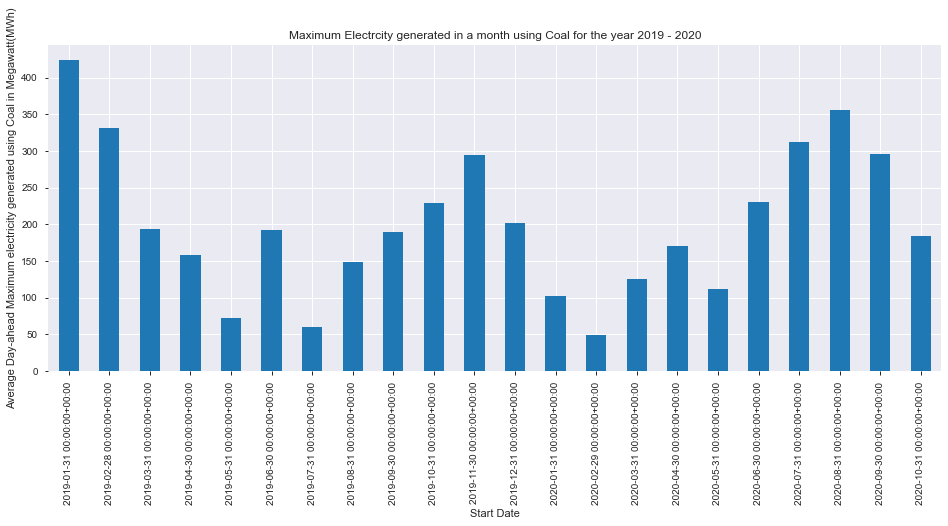

In [35]:
title = 'Maximum Electrcity generated in a month using Coal for the year 2019 - 2020'
wg_coal['Coal'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4',
                                            xlabel='Start Date', ylabel= 'Average Day-ahead Maximum electricity generated using Coal in Megawatt(MWh)');

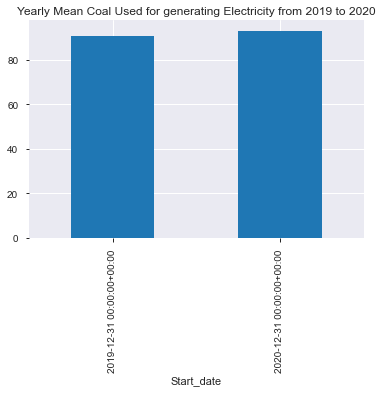

In [37]:
wg_coal['Coal'].resample('A').mean().plot.bar(title='Yearly Mean Coal Used for generating Electricity from 2019 to 2020');

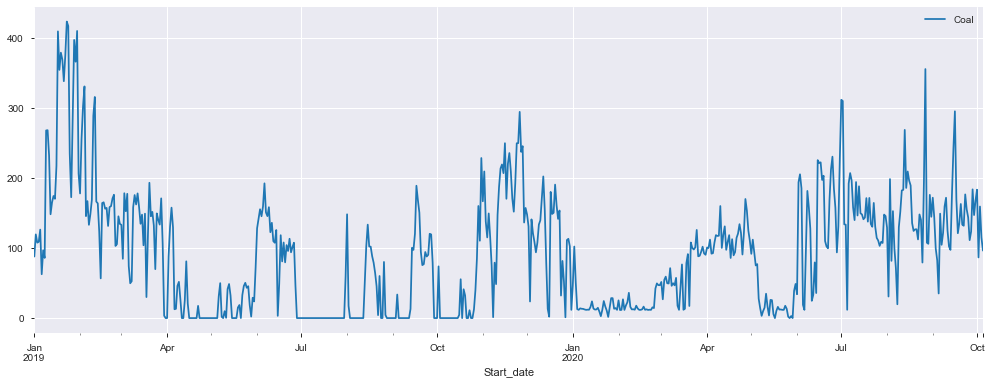

In [38]:
wg_coal.plot(figsize=(17,6));

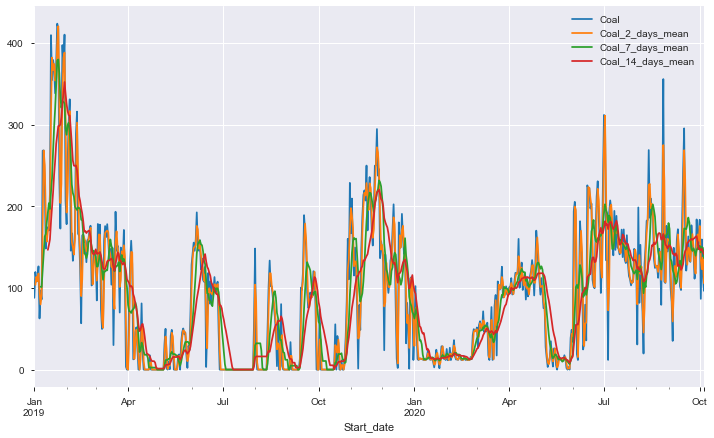

In [39]:
wg_coal['Coal_2_days_mean'] = wg_coal['Coal'].rolling(window=2).mean().round(2)
wg_coal['Coal_7_days_mean'] = wg_coal['Coal'].rolling(window=7).mean().round(2)
wg_coal['Coal_14_days_mean'] = wg_coal['Coal'].rolling(window=14).mean().round(2)
wg_coal.plot(figsize=(12,7));

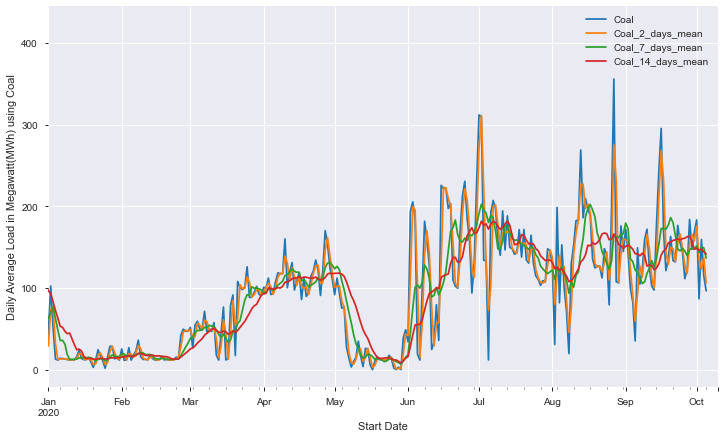

In [42]:
wg_coal.plot(figsize=(12,7),xlim=['2020-01-01','2020-10-10'],
                  xlabel='Start Date', ylabel= 'Daily Average Load in Megawatt(MWh) using Coal');

In [43]:
result = seasonal_decompose(wg_coal['Coal'])

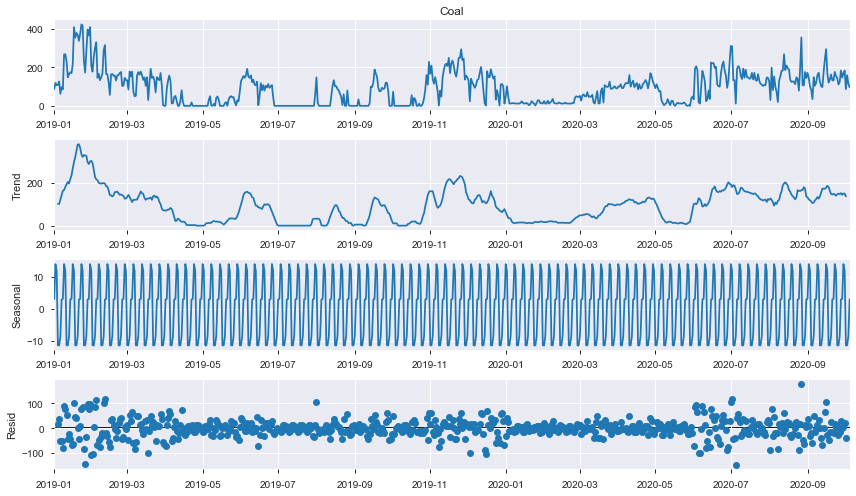

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] =12,7
result.plot();

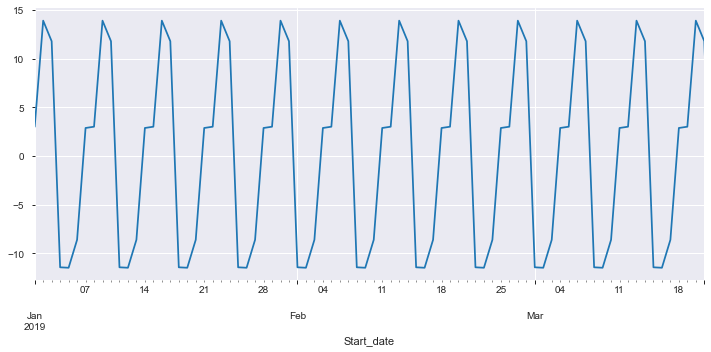

In [45]:
result.seasonal.plot(figsize = (12,5), xlim=['2019-01-01','2019-03-21']);

In [46]:
train_wg_coal = pd.DataFrame(wg_coal['Coal'].loc['2019-04-01':'2020-09-30'])
test_wg_coal = pd.DataFrame(wg_coal['Coal'].loc['2020-10-01':'2020-10-05'])

In [47]:
test_wg_coal

,Coal
Start_date,
2020-10-01 00:00:00+00:00,183.46
2020-10-02 00:00:00+00:00,86.71
2020-10-03 00:00:00+00:00,159.40
2020-10-04 00:00:00+00:00,115.15
2020-10-05 00:00:00+00:00,96.50


In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [49]:
fitted_model = ExponentialSmoothing(train_wg_coal['Coal'], seasonal='add',
                                    seasonal_periods=7).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [53]:
test_prediction=fitted_model.forecast(5)

In [54]:
test_prediction

2020-10-01 00:00:00+00:00    165.594493
2020-10-02 00:00:00+00:00    144.325886
2020-10-03 00:00:00+00:00    143.625473
2020-10-04 00:00:00+00:00    142.763137
2020-10-05 00:00:00+00:00    155.379033
Freq: D, dtype: float64

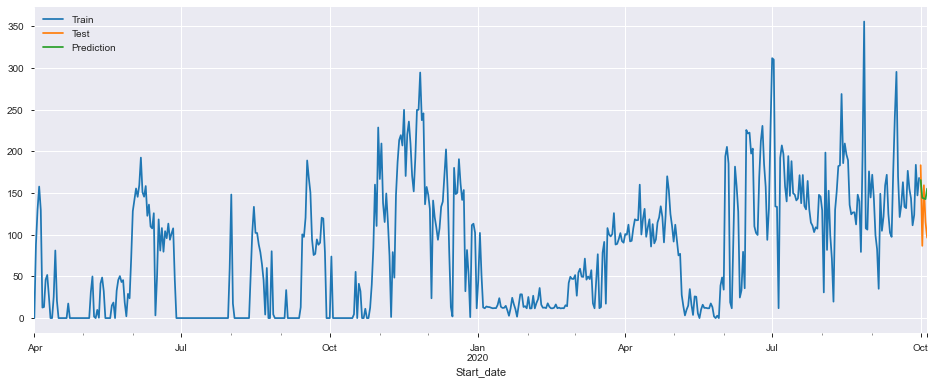

In [55]:
train_wg_coal['Coal'].plot(legend = True, label = 'Train', figsize=(16,6))
test_wg_coal['Coal'].plot(legend = True, label = 'Test')
test_prediction.plot(legend = True, label = 'Prediction');

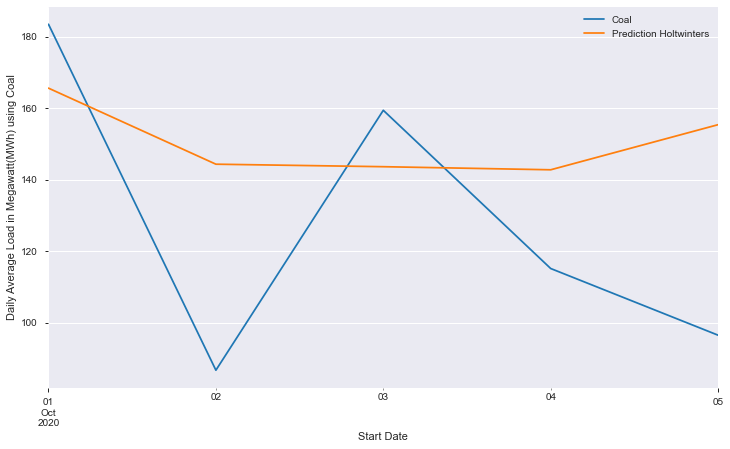

In [101]:
test_wg_coal['Coal'].plot(legend = True, label = 'Coal')
test_prediction.plot(legend = True, label = 'Prediction Holtwinters',xlim=['2020-10-01','2020-10-05'],
                    xlabel='Start Date', ylabel= 'Daily Average Load in Megawatt(MWh) using Coal');

In [58]:
test_wg_coal['Coal'].describe()

count      5.000000
mean     128.244000
std       41.604418
min       86.710000
25%       96.500000
50%      115.150000
75%      159.400000
max      183.460000
Name: Coal, dtype: float64

In [105]:
print(mean_absolute_error(test_wg_coal['Coal'],test_prediction))
print(mean_squared_error(test_wg_coal['Coal'],test_prediction))
print(np.sqrt(mean_squared_error(test_wg_coal['Coal'],test_prediction)))

35.549617817175395
1623.3656289063342
40.291011763249806


In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

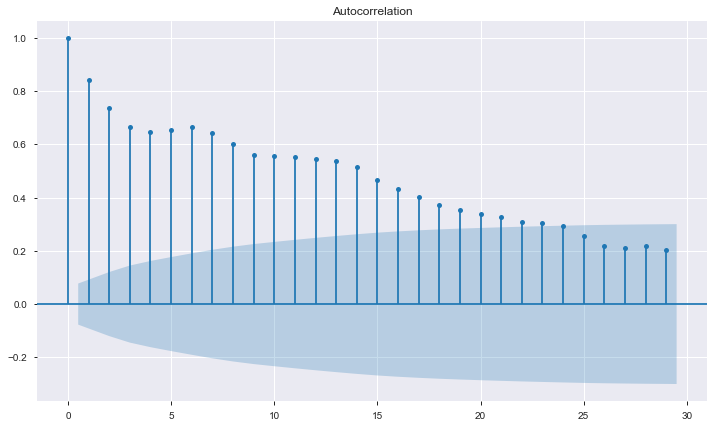

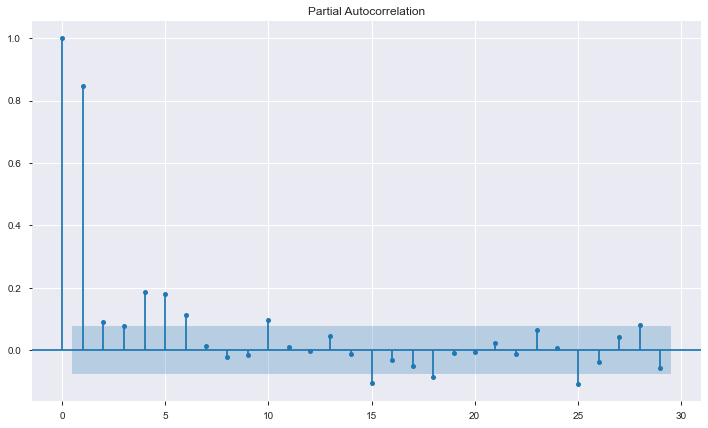

In [61]:
plot_acf(wg_coal['Coal']);
plot_pacf(wg_coal['Coal']);

In [62]:
from statsmodels.tsa.ar_model import AR, ARResults

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
train_wg_coal_ar = train_wg_coal['Coal']
train_wg_coal_ar=pd.DataFrame(data=train_wg_coal_ar)

In [65]:
test_wg_coal_ar = test_wg_coal['Coal']
test_wg_coal_ar=pd.DataFrame(data=test_wg_coal_ar)

In [66]:
pred_start_date= test_wg_coal_ar.index[0]
pred_end_date = test_wg_coal_ar.index[-1]

In [67]:
arima_1_model = AR(train_wg_coal_ar['Coal'])
arima_1_model_fit = arima_1_model.fit(maxlag=1)
prediction_AR1= arima_1_model_fit.predict(start=pred_start_date, end =pred_end_date)

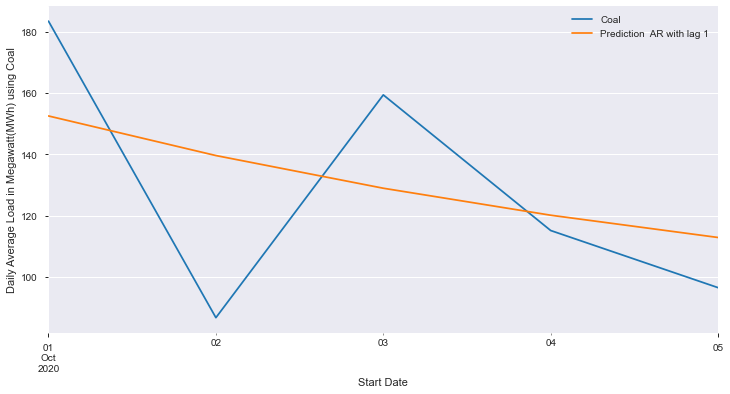

In [106]:
test_wg_coal_ar.plot(figsize=(12,6), legend= True, label= 'Test data')
prediction_AR1.plot(legend =True, label = 'Prediction  AR with lag 1',
                    xlabel='Start Date', ylabel= 'Daily Average Load in Megawatt(MWh) using Coal');

In [107]:
# AR model with lag 1
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wg_coal_ar['Coal'],prediction_AR1))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wg_coal_ar['Coal'],prediction_AR1))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wg_coal_ar['Coal'],prediction_AR1)))

Mean Absolute Error of ARIMA model : 27.130444408233075
Mean Squared Error of ARIMA model : 995.1510863740705
Root Mean Squared Error of ARIMA model : 31.54601538029915


# Forecasting with AR 1

In [113]:
forecast_df = pd.DataFrame(wg_coal['Coal'].loc['2019-04-01':'2020-10-05'])

In [114]:
forecast_model = AR(forecast_df)
forecast_model_fit = forecast_model.fit(maxlag=1)

In [115]:
forecast_prediction = forecast_model_fit.predict(start=len(forecast_df), end =len(forecast_df)+5).rename('Forecast')

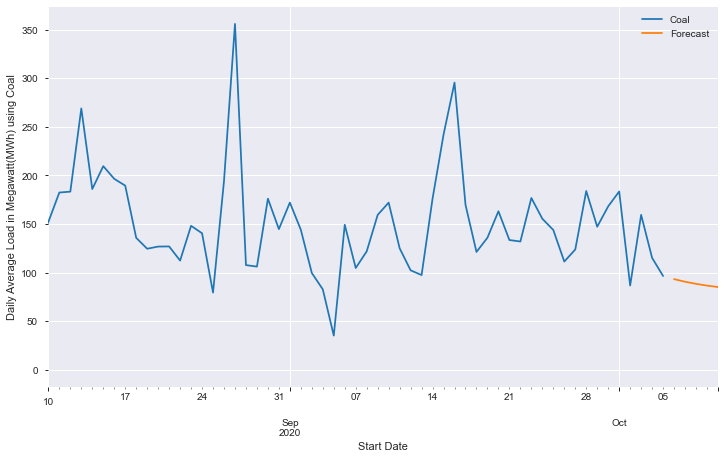

In [116]:
forecast_df['Coal'].plot(legend = True)
forecast_prediction.plot(legend = True, label = 'Forecast', xlim=['2020-08-10','2020-10-10'],
                         xlabel='Start Date', ylabel= 'Daily Average Load in Megawatt(MWh) using Coal');

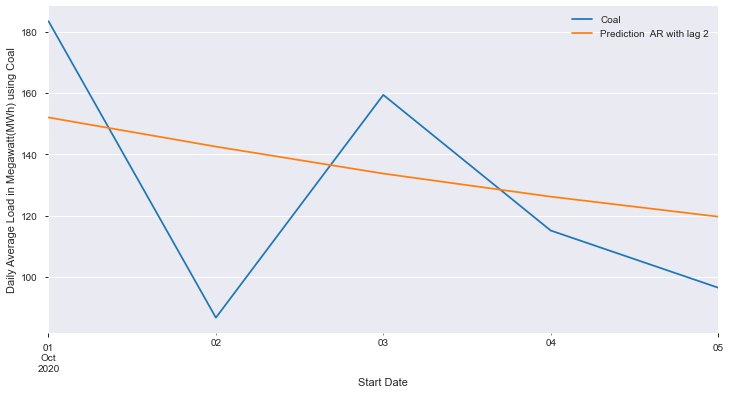

In [71]:
arima_2_model = AR(train_wg_coal_ar['Coal'])
arima_2_model_fit = arima_2_model.fit(maxlag=2)
prediction_AR2= arima_2_model_fit.predict(start=pred_start_date, end =pred_end_date)
test_wg_coal_ar.plot(figsize=(12,6), legend= True)
prediction_AR2.plot(legend =True, label = 'Prediction  AR with lag 2',
                    xlabel='Start Date', ylabel= 'Daily Average Load in Megawatt(MWh) using Coal');

In [95]:
# AR model with lag 2
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wg_coal_ar['Coal'],prediction_AR2))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wg_coal_ar['Coal'],prediction_AR2))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wg_coal_ar['Coal'],prediction_AR2)))

Mean Absolute Error of ARIMA model : 29.425400328444788
Mean Squared Error of ARIMA model : 1084.174814815639
Root Mean Squared Error of ARIMA model : 32.92680997023002


In [73]:
ar_final_model = AR(train_wg_coal_ar['Coal'])
ar_final_model_fit = ar_final_model.fit()
ar_final_model_fit.params

const       8.178518
L1.Coal     0.653735
L2.Coal     0.072311
L3.Coal    -0.045315
L4.Coal     0.075021
L5.Coal     0.034439
L6.Coal     0.073782
L7.Coal     0.022556
L8.Coal     0.004398
L9.Coal    -0.060433
L10.Coal    0.029753
L11.Coal    0.025720
L12.Coal    0.008033
L13.Coal    0.070083
L14.Coal    0.071764
L15.Coal   -0.055154
L16.Coal    0.068858
L17.Coal   -0.037753
L18.Coal   -0.111168
dtype: float64

In [74]:
prediction_AR18= ar_final_model_fit.predict(start=pred_start_date, end =pred_end_date)

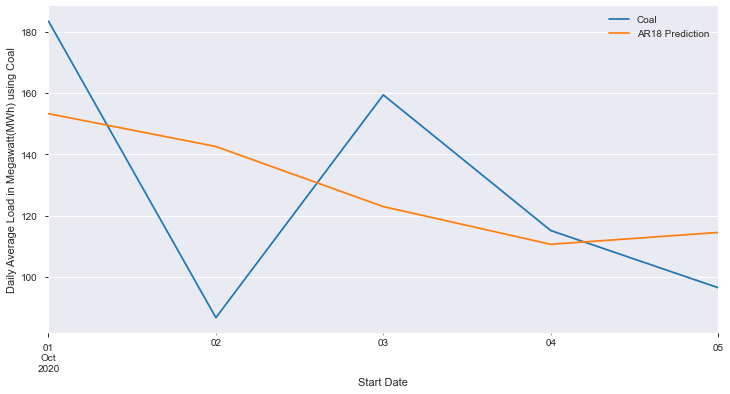

In [75]:
test_wg_coal_ar.plot(figsize=(12,6), legend= True)
prediction_AR18.plot(legend =True, label = 'AR18 Prediction',
                    xlabel='Start Date', ylabel= 'Daily Average Load in Megawatt(MWh) using Coal');

In [96]:
# AR model with lag 18
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wg_coal_ar['Coal'],prediction_AR18))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wg_coal_ar['Coal'],prediction_AR18))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wg_coal_ar['Coal'],prediction_AR18)))

Mean Absolute Error of ARIMA model : 28.994463507849616
Mean Squared Error of ARIMA model : 1140.4846166792115
Root Mean Squared Error of ARIMA model : 33.771061823389736


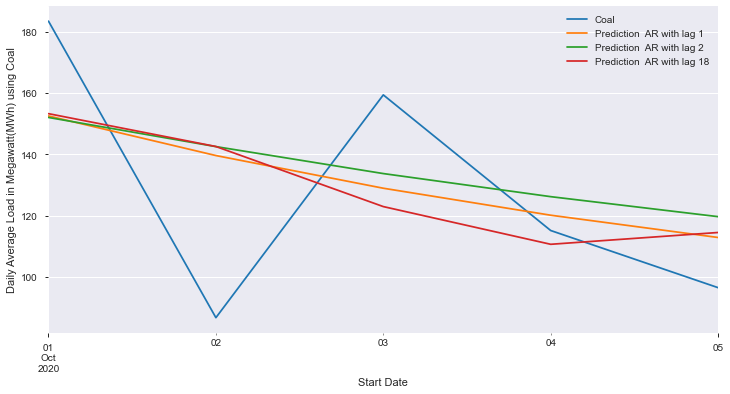

In [110]:
test_wg_coal_ar.plot(figsize=(12,6), legend= True, label = 'Test Data')
prediction_AR1.plot(legend =True, label = 'Prediction  AR with lag 1')
prediction_AR2.plot(legend =True, label = 'Prediction  AR with lag 2')
prediction_AR18.plot(legend =True, label = 'Prediction  AR with lag 18',xlabel='Start Date', ylabel= 'Daily Average Load in Megawatt(MWh) using Coal');

In [78]:
# Stationarity Test.

In [79]:
from statsmodels.tsa.stattools import adfuller

In [98]:
adfuller(train_wg_coal['Coal'])

(-3.4935891656070144,
 0.00815327241835572,
 5,
 543,
 {'1%': -3.442450336733213,
  '5%': -2.8668774460774498,
  '10%': -2.5696126760816553},
 5415.711306669326)

In [78]:
# resDiff = sm.tsa.arma_order_select_ic(train_wg_coal_ar['Coal'], max_ar=9, max_ma=7, ic='aic',)
# print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (7, 4) is the best.


In [81]:
model = pm.auto_arima(train_wg_coal['Coal'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=9, max_q=7, # maximum p and q
                      ic='aic',              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6680.164, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5673.657, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6241.327, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5662.545, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5659.602, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=5643.510, Time=0.12 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=5635.500, Time=0.21 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=5630.396, Time=0.22 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=5631.860, Time=0.27 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=5629.569, Time=0.41 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=5627.650, Time=0.29 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=5625.653, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5628.478, Time=0.23 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=5628.491, Time=0.49 sec
 ARIMA(3,0,2)(0,0,0)[0]          

In [82]:
arima_model = ARIMA(train_wg_coal_ar['Coal'], order=(4,0,1), freq='D')
arima_model_fit = arima_model.fit()
prediction_arima = arima_model_fit.predict(start=pred_start_date, end =pred_end_date)

In [83]:
prediction_arima

2020-10-01 00:00:00+00:00    150.389198
2020-10-02 00:00:00+00:00    145.244532
2020-10-03 00:00:00+00:00    139.309888
2020-10-04 00:00:00+00:00    137.535278
2020-10-05 00:00:00+00:00    136.020059
Freq: D, dtype: float64

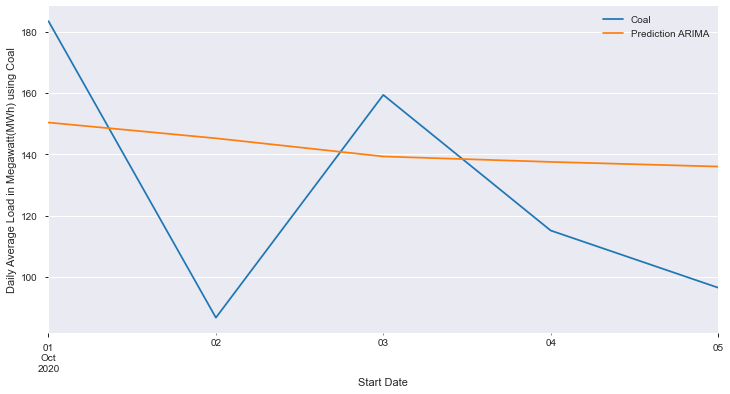

In [102]:
test_wg_coal_ar.plot(figsize=(12,6), legend= True, label= 'Test data')
prediction_arima.plot(legend =True, label = 'Prediction ARIMA',
                     xlabel='Start Date', ylabel= 'Daily Average Load in Megawatt(MWh) using Coal');

In [103]:
# ARIMA model with order of (4,0,1)
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wg_coal_ar['Coal'],prediction_arima))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wg_coal_ar['Coal'],prediction_arima))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wg_coal_ar['Coal'],prediction_arima)))

Mean Absolute Error of ARIMA model : 34.720156552782235
Mean Squared Error of ARIMA model : 1397.303538269513
Root Mean Squared Error of ARIMA model : 37.38052351518787


In [86]:
auto_model = auto_arima(train_wg_coal,start_p=0,start_q=0, max_p=9, max_q=5, start_P=0, start_Q=0,m=7, seasonal= True)

In [87]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2804.500
Date:                Wed, 02 Dec 2020   AIC                           5615.001
Time:                        03:04:25   BIC                           5627.919
Sample:                             0   HQIC                          5620.050
                                - 549                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5480      0.047     11.596      0.000       0.455       0.641
ma.L1         -0.8611      0.037    -23.209      0.000      -0.934      -0.788
sigma2      1630.6391     61.579     26.480      0.000    1509.946    1751.333
===================================================================================
Ljung-Box (Q):                       75.78   Jarque-Bera (JB):               316.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.61   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [89]:
sarima_model = sm.tsa.statespace.SARIMAX(train_wg_coal_ar['Coal'],
                                order=(1,1,1),
                                seasonal_order=(0, 0, 0, 7),)
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5480      0.047     11.596      0.000       0.455       0.641
ma.L1         -0.8611      0.037    -23.209      0.000      -0.934      -0.788
sigma2      1630.6391     61.579     26.480      0.000    1509.946    1751.333


In [90]:
prediction_sarima = sarima_model_fit.predict(start=pred_start_date, end =pred_end_date)

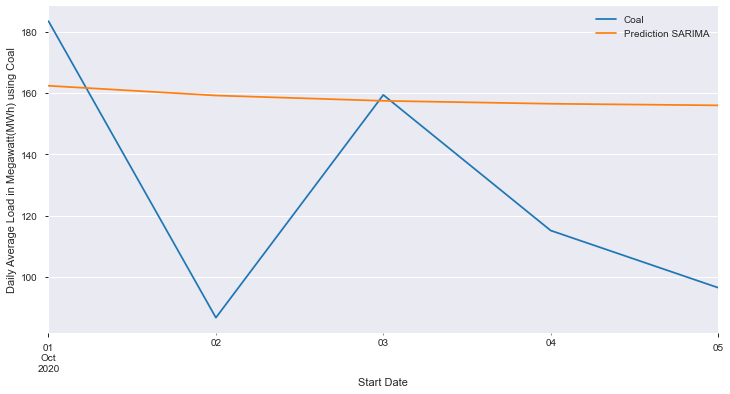

In [112]:
test_wg_coal_ar.plot(figsize=(12,6), legend= True)
prediction_sarima.plot(legend = True ,label = 'Prediction SARIMA',
                      xlabel='Start Date', ylabel= 'Daily Average Load in Megawatt(MWh) using Coal');

In [104]:
# SARIMA model with order of (1,1,1)
print('Mean Absolute Error of ARIMA model :',mean_absolute_error(test_wg_coal_ar['Coal'],prediction_sarima))
print('Mean Squared Error of ARIMA model :',mean_squared_error(test_wg_coal_ar['Coal'],prediction_sarima))
print('Root Mean Squared Error of ARIMA model :',np.sqrt(mean_squared_error(test_wg_coal_ar['Coal'],prediction_sarima)))

Mean Absolute Error of ARIMA model : 39.27275004189297
Mean Squared Error of ARIMA model : 2190.7347698222343
Root Mean Squared Error of ARIMA model : 46.80528570388428
